<a href="https://colab.research.google.com/github/SergeiVKalinin/PNNL_ML_2024/blob/main/Day_5_DCNN_Filters_Losses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Tutorial notebook for the Summer PNNL ML Course
- Instructor Sergei V. Kalinin

Based on the
- Rowel Atienza book: https://subscription.packtpub.com/book/programming/9781838821654/pref
and
- Francois Chollet book: https://livebook.manning.com/book/deep-learning-with-python-second-edition/deep-learning-with-python/
- ChatGPT Examples

# Filters

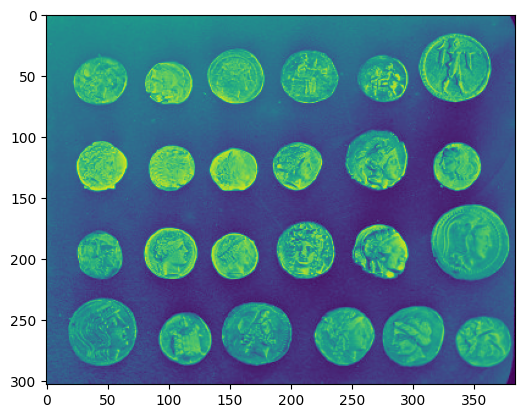

In [1]:
from skimage import data, feature, color, io
import numpy as np
import matplotlib.pyplot as plt

# Load the 'coins' image
image = data.coins()

plt.imshow(image)
plt.show()

## Log Blob

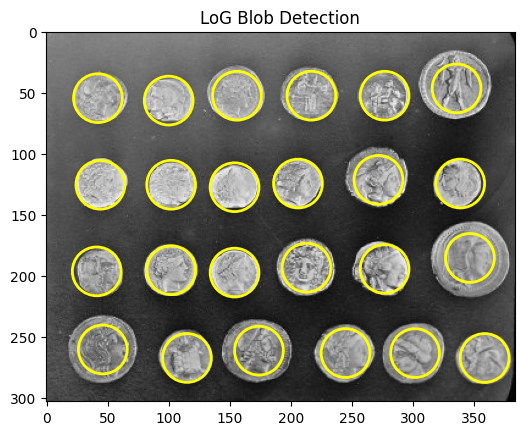

In [2]:
# Detect blobs using LoG (Laplacian of Gaussian)
blobs_log = feature.blob_log(image, min_sigma = 20, max_sigma=50, num_sigma=50, threshold=0.05)

# Plot detected blobs
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_title('LoG Blob Detection')
plt.show()


## Canny Edge

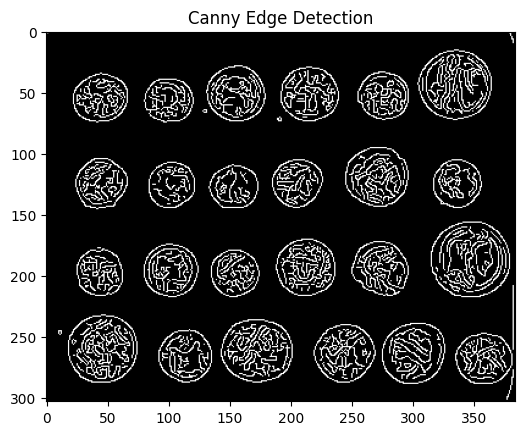

In [3]:
from skimage.feature import canny

# Apply Canny Edge Detection
edges = canny(image)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

## Hough Circle

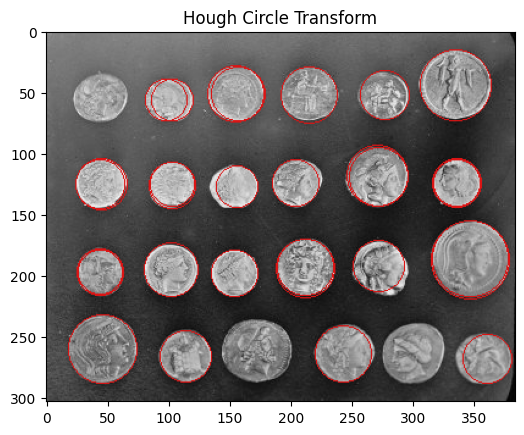

In [4]:
from skimage import data, color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
import matplotlib.pyplot as plt

# Apply Canny edge detection (optional but often improves results)
edges = canny(image, sigma=3)

# Detecting circles using Hough Transform
hough_radii = np.arange(5, 50, 1)  # Range of potential radii
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=30)

# Draw them on the image
fig, ax = plt.subplots()
image_color = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image_color[circy, circx] = (220, 20, 20)

ax.imshow(image_color)
ax.set_title('Hough Circle Transform')
plt.show()


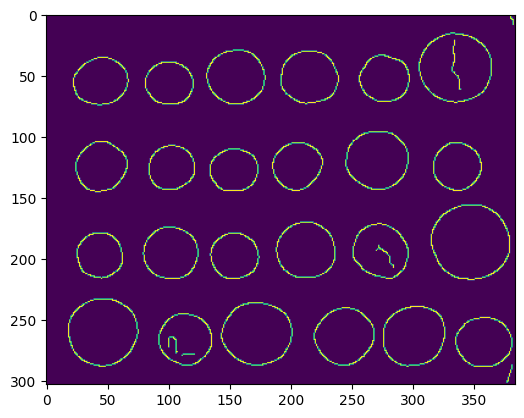

In [5]:
plt.imshow(edges)

## Gabor

In [6]:
from skimage import data, io, filters
import matplotlib.pyplot as plt
import numpy as np

# Load the 'coins' image
coins_image = data.coins()

In [7]:
def apply_gabor_filter(image, frequency, theta):
    """
    Apply a Gabor filter to an image with specified frequency and orientation (theta).
    """
    # Generate Gabor kernel
    gabor_kernel = filters.gabor_kernel(frequency, theta=theta)

    # Filter the image using the real part of the Gabor kernel
    filtered_image = filters.gabor(image, frequency=frequency, theta=theta)[0]

    return filtered_image

# Define frequencies and orientations for the Gabor filters
frequencies = [0.1, 0.2, 0.3]
thetas = [0, np.pi/4, np.pi/2]

# Apply Gabor filters and store results
filtered_images = []
for frequency in frequencies:
    for theta in thetas:
        filtered_img = apply_gabor_filter(coins_image, frequency, theta)
        filtered_images.append((filtered_img, frequency, theta))


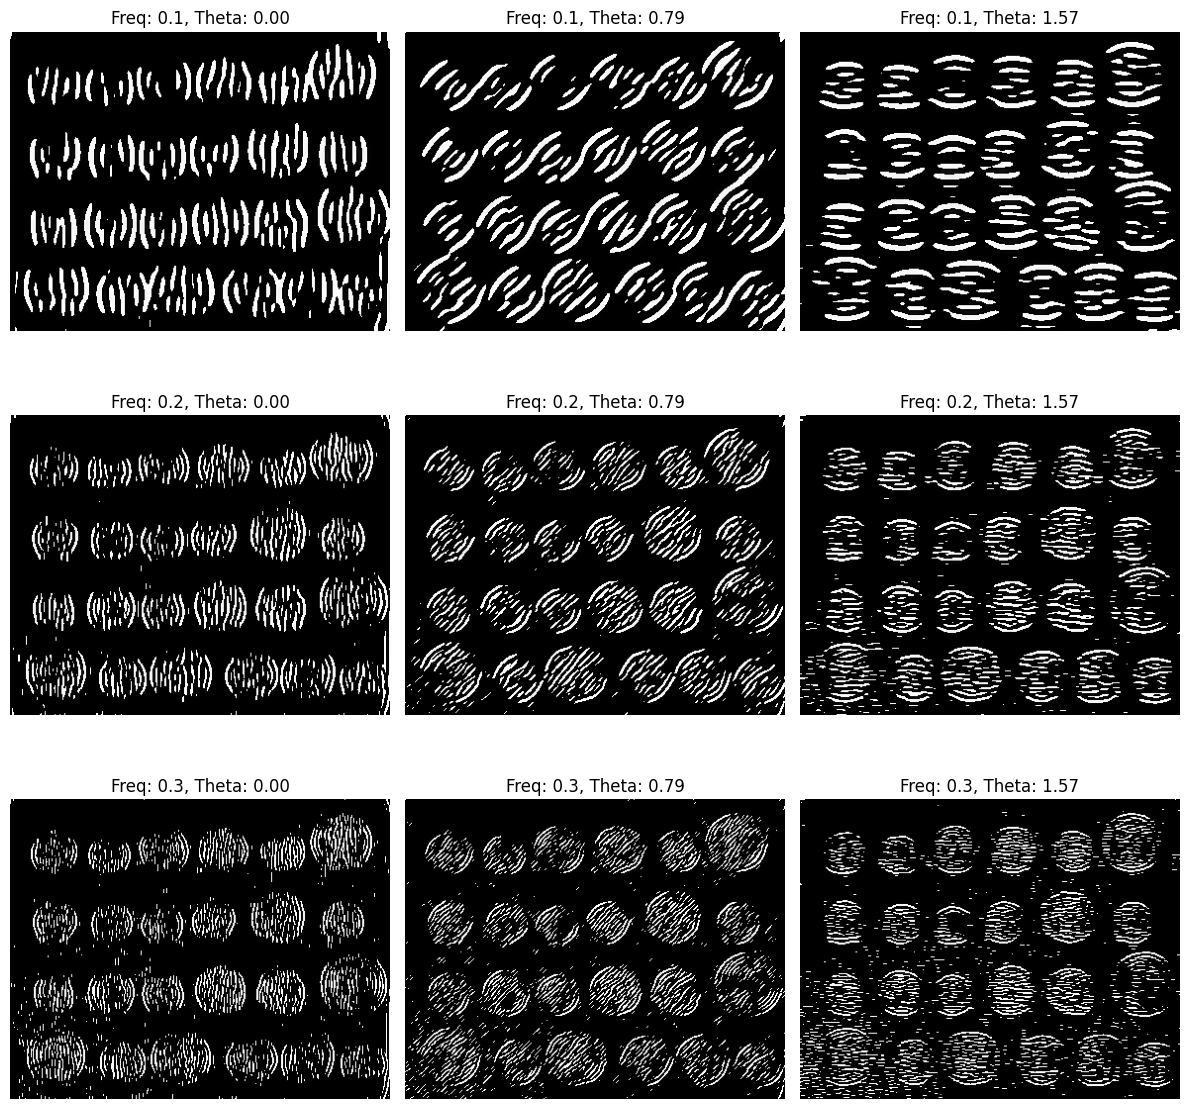

In [8]:
# Plot the filtered images in a 3x3 grid
plt.figure(figsize=(12, 12))

# Choose a subset of filters for visualization
selected_filters = filtered_images[:9]

for i, (filtered_img, frequency, theta) in enumerate(selected_filters, 1):
    plt.subplot(3, 3, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Freq: {frequency}, Theta: {theta:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

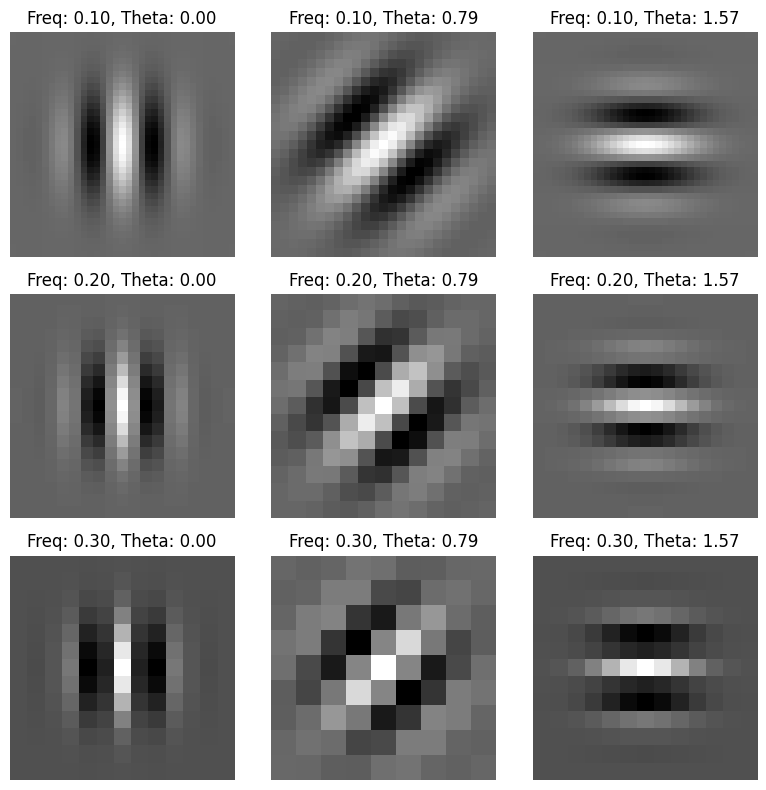

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor_kernel

# Define frequencies and orientations (thetas)
frequencies = [0.1, 0.2, 0.3]  # First three frequencies
thetas = [0, np.pi/4, np.pi/2]  # First three orientations

plt.figure(figsize=(8, 8))

# Iterate over frequencies and thetas to create and plot Gabor kernels
for i, frequency in enumerate(frequencies):
    for j, theta in enumerate(thetas):
        # Create Gabor kernel
        gabor_real = np.real(gabor_kernel(frequency, theta=theta))

        # Plotting
        plt.subplot(len(frequencies), len(thetas), i * len(thetas) + j + 1)
        plt.imshow(gabor_real, cmap='gray')
        plt.title(f'Freq: {frequency:.2f}, Theta: {theta:.2f}')
        plt.axis('off')

plt.tight_layout()
plt.show()


# Keras: NNs made easy

In [10]:
# We import the necessary modules from TensorFlow and Keras. 'keras' is a high-level API for TensorFlow
# 'layers' is used to create layers in our neural network

from tensorflow import keras
from tensorflow.keras import layers

# Defining our model. The model is Sequential, meaning that it is composed of a linear stack of layers.
# It contains two layers.
# The first layer is a dense (or fully connected) layer with 64 nodes (or neurons). The activation function is 'relu'.
# The second layer is also a dense layer with 10 nodes. The activation function here is 'softmax'.
# 'softmax' is typically used in the output layer of a multi-class classification problem, it gives a probability distribution over the output classes.

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [11]:
# Here we're initializing our model as a Sequential model again
model = keras.Sequential()

# We're adding the first layer - a dense layer with 64 nodes and 'relu' activation
model.add(layers.Dense(64, activation="relu"))

# We're adding the second layer - a dense layer with 10 nodes and 'softmax' activation
model.add(layers.Dense(10, activation="softmax"))

# Now, we build our model, specifying the input shape. The 'None' in the input shape means it can take any integer value, giving flexibility on the batch size
model.build(input_shape=(None, 3))

In [12]:
# The model's weights can be accessed and we print the length to show how many tensors of weights we have
print(len(model.weights))

# We can also check the shape of the weights of any layer, here we're checking the shape of weights of the first layer
print(model.weights[0].shape)

# This line is to print the shape of weights and biases of all the layers
print([i.shape for i in model.weights])

# We call model.summary() to get a text summary of the model architecture, which includes layers, output shapes and the number of parameters
print(model.summary())

4
(3, 64)
[TensorShape([3, 64]), TensorShape([64]), TensorShape([64, 10]), TensorShape([10])]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
# Naming the model and the layers

# We're defining our model with a name 'my_example_model'
model = keras.Sequential(name="my_example_model")

# We're adding the first layer with 64 nodes and 'relu' activation and giving it a name 'my_first_layer'
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))

# We're adding the second layer with 10 nodes and 'softmax' activation and giving it a name 'my_last_layer'
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))

# We build our model with a flexible input shape
model.build((None, 3))

# We call model.summary() to get a text summary of the model architecture
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# We're initializing our model as a Sequential model again
model = keras.Sequential()

# We're defining the input shape using keras.Input function
model.add(keras.Input(shape=(3,)))

# We're adding a dense layer with 64 nodes and 'relu' activation
model.add(layers.Dense(64, activation="relu"))

# We call model.summary() to get a text summary of the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# We're further adding a dense layer (output) with 10 nodes and 'softmax' activation
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Define the input layer. 'shape' argument specifies the shape of the input data excluding the batch size.
# The 'name' argument assigns a name to this layer.
inputs = keras.Input(shape=(3,), name="my_input")

# Connect a dense layer to the inputs. This layer will have 64 neurons and will use the ReLU activation function.
# When this line is executed, Keras implicitly creates the weight and bias variables of this layer.
# The weights will have the shape (3, 64), and the biases will have the shape (64,).
# The shape of the weights is determined by the number of input features (3 in this case) and the number of neurons in the layer (64 in this case).
# The shape of the biases is determined by the number of neurons in the layer.
features = layers.Dense(64, activation="relu")(inputs)

# Connect another dense layer to the previous layer.
# This layer will have 10 neurons (because we have 10 classes in our problem) and will use the softmax activation function.
# The shape of the weights of this layer will be (64, 10), and the shape of the biases will be (10,).
outputs = layers.Dense(10, activation="softmax")(features)

# Define the model by specifying its inputs and outputs.
# In this case, the model has a single input (the "inputs" layer) and a single output (the "outputs" layer).
model = keras.Model(inputs=inputs, outputs=outputs)

# Print a summary of the model, which includes the number of parameters in each layer and in the whole model.
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
features.shape

TensorShape([None, 64])

# Enter the MNIST

11490434/11490434 [==============================] - 2s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


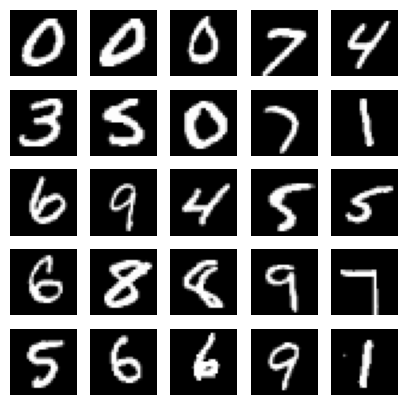

In [19]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

# MNIST MLP

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [21]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the network and record its history.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=batch_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)               

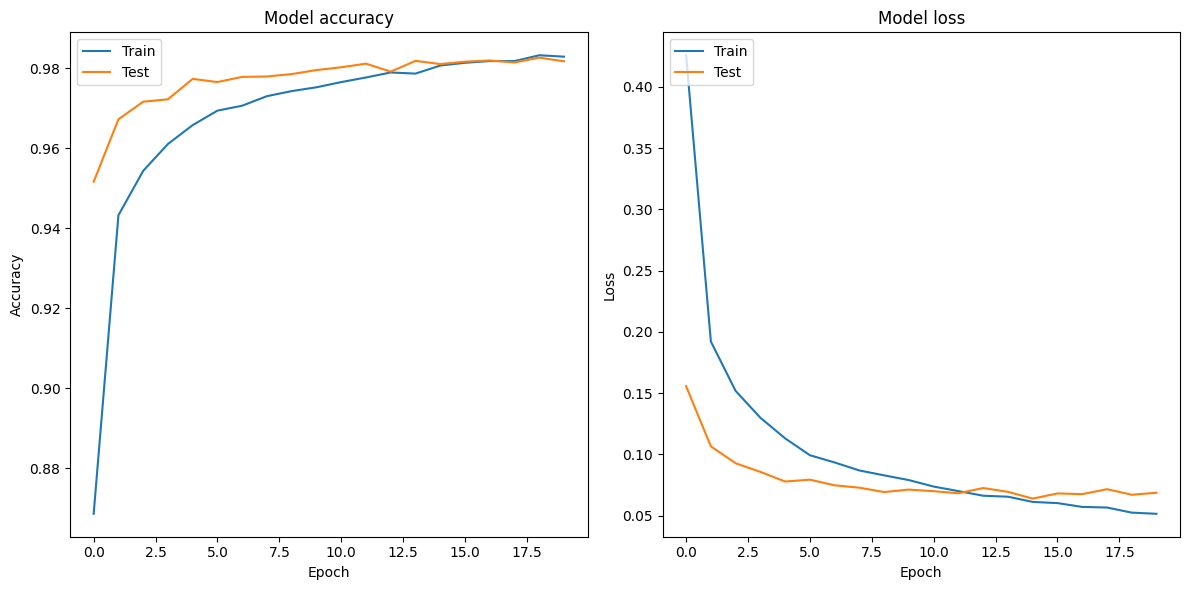

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

313/313 [==============================] - 0s 1ms/step


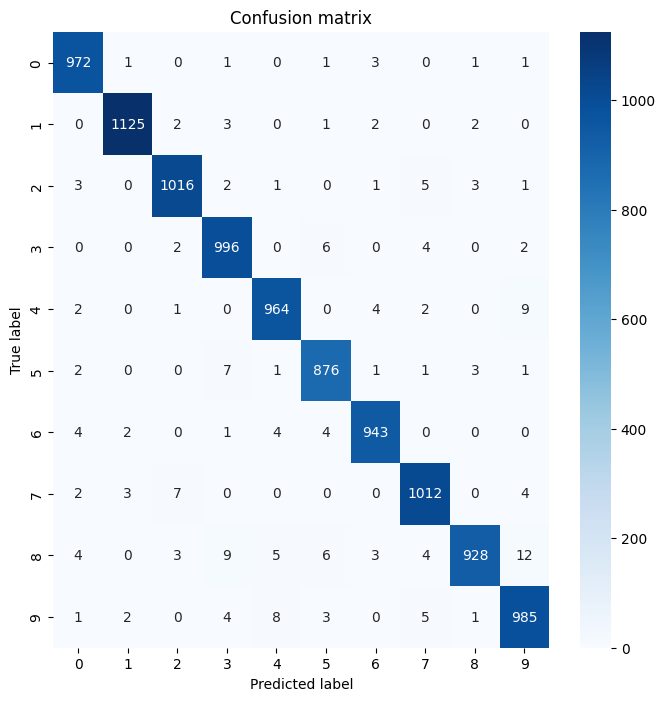

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get model's predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# MNIST DCNN

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]

# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                   verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

# Do features matter?

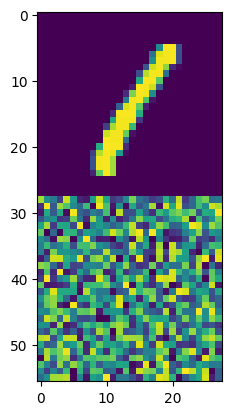

In [25]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST data.
(train_images, train_labels), _ = mnist.load_data()

# Flattening the images and normalizing pixel values to be between 0 and 1.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Concatenating the training images with a random noise channel, essentially doubling the dataset size.
# The second half of the data for each image will just be noise.
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# Concatenating the training images with a channel of zeros.
# The second half of the data for each image will just be zeros.
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


train_images_with_noise_channels.shape


# Visualizing one of the noise images
plt.imshow(train_images_with_noise_channels[3].reshape(56,28))

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

# Defining a function that will create our model.
def get_model():
    # Defining the structure of the model.
    model = keras.Sequential([
        # The first layer of the model is a dense layer with 512 units and 'relu' activation function.
        layers.Dense(512, activation="relu"),
        # The second (output) layer of the model is a dense layer with 10 units and 'softmax' activation function.
        layers.Dense(10, activation="softmax")
    ])
    # Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
    # and we want to track 'accuracy' metric.
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Training the model on the noisy data.
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# Training the model on the zero-channel data.
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6139 - accuracy: 0.8123 - val_loss: 0.3115 - val_accuracy: 0.8953
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.9222 - val_loss: 0.1981 - val_accuracy: 0.9398
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1668 - accuracy: 0.9485 - val_loss: 0.1622 - val_accuracy: 0.9507
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1190 - accuracy: 0.9633 - val_loss: 0.1422 - val_accuracy: 0.9596
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.9724 - val_loss: 0.1528 - val_accuracy: 0.9538
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9789 - val_loss: 0.1566 - val_accuracy: 0.9553
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.1401 - val_accuracy: 0.9588
Epoch 

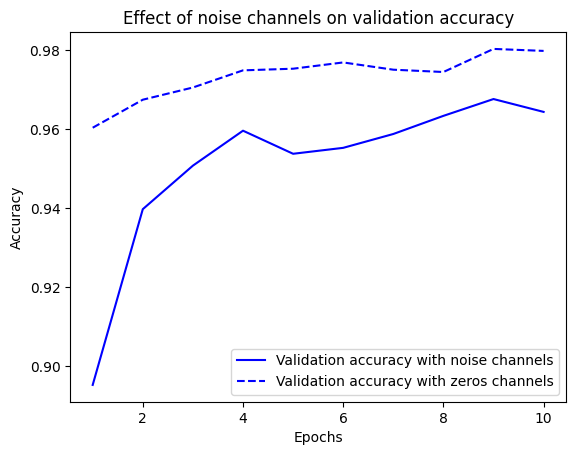

In [27]:
# Extracting the validation accuracy from the training history for both models.
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

# The range of epochs we trained for, to be used as the x-axis in the plot.
epochs = range(1, 11)

# Plotting the validation accuracy of the models trained on noisy data and zero-channel data over the epochs.
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#Tuning network structure

In [28]:
(train_images, train_labels), _ = mnist.load_data()

# Reshaping the images and normalizing pixel values.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Shuffling the labels randomly. The labels no longer match the images.
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and randomly shuffled labels.
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

# Making predictions on the train images.
output = model.predict(train_images)

# Checking the shapes of the output.
output.shape
output.argmax(axis = 1).shape

# Checking how often the model's predictions match the shuffled labels.
(output.argmax(axis = 1) == random_train_labels).mean()

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3149 - accuracy: 0.1042 - val_loss: 2.3066 - val_accuracy: 0.1066
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2996 - accuracy: 0.1163 - val_loss: 2.3092 - val_accuracy: 0.1056
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2918 - accuracy: 0.1249 - val_loss: 2.3164 - val_accuracy: 0.1015
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2809 - accuracy: 0.1376 - val_loss: 2.3224 - val_accuracy: 0.1028
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2648 - accuracy: 0.1524 - val_loss: 2.3350 - val_accuracy: 0.1030
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2484 - accuracy: 0.1612 - val_loss: 2.3448 - val_accuracy: 0.1030
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2257 - accuracy: 0.1764 - val_loss: 2.3607 - val_accuracy: 0.1015

0.74945

In [29]:
output = model.predict(train_images)
output.shape

1875/1875 [==============================] - 2s 1ms/step


(60000, 10)

In [30]:
output.argmax(axis = 1).shape

(60000,)

In [31]:
(output.argmax(axis = 1) == random_train_labels).mean()

0.74945

In [32]:
(train_images, train_labels), _ = mnist.load_data()

# Reshaping the images and normalizing pixel values.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer with high learning rate (1),
# sparse categorical cross entropy as loss function, and we want to track 'accuracy' metric.
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 466.8264 - accuracy: 0.3052 - val_loss: 2.3760 - val_accuracy: 0.2169
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.7319 - accuracy: 0.1995 - val_loss: 2.2427 - val_accuracy: 0.1902
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0280 - accuracy: 0.1991 - val_loss: 2.1968 - val_accuracy: 0.2363
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6296 - accuracy: 0.2081 - val_loss: 2.2549 - val_accuracy: 0.1983
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2552 - accuracy: 0.2144 - val_loss: 2.1740 - val_accuracy: 0.2190
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3721 - accuracy: 0.2144 - val_loss: 2.1578 - val_accuracy: 0.2088
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4985 - accuracy: 0.2308 - val_loss: 2.1404 - val_accuracy: 0.2192
Epoc

In [33]:
# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer with low learning rate (1e-2),
# sparse categorical cross entropy as loss function, and we want to track 'accuracy' metric.
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.9115 - val_loss: 0.2273 - val_accuracy: 0.9343
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1242 - accuracy: 0.9652 - val_loss: 0.1473 - val_accuracy: 0.9630
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9737 - val_loss: 0.1632 - val_accuracy: 0.9643
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9795 - val_loss: 0.1814 - val_accuracy: 0.9680
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9831 - val_loss: 0.1568 - val_accuracy: 0.9733
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9844 - val_loss: 0.1693 - val_accuracy: 0.9756
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0545 - accuracy: 0.9876 - val_loss: 0.2029 - val_accuracy: 0.9693
Epoch 

In [34]:
# Building a very simple model with only an output layer.
model = keras.Sequential([layers.Dense(10, activation="softmax")])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6586 - accuracy: 0.8435 - val_loss: 0.3583 - val_accuracy: 0.9049
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.9028 - val_loss: 0.3093 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.9118 - val_loss: 0.2932 - val_accuracy: 0.9177
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9162 - val_loss: 0.2837 - val_accuracy: 0.9210
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.9184 - val_loss: 0.2791 - val_accuracy: 0.9218
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9197 - val_loss: 0.2765 - val_accuracy: 0.9218
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9214 - val_loss: 0.2713 - val_accuracy: 0.9249
Epoch 

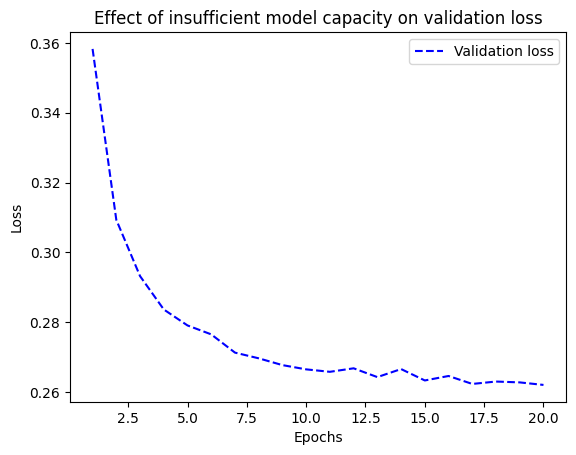

In [35]:
import matplotlib.pyplot as plt

# Plotting the validation loss of the model with insufficient capacity.
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [36]:
# Building a larger model with two hidden layers and an output layer.
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3739 - accuracy: 0.8935 - val_loss: 0.1825 - val_accuracy: 0.9483
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1608 - accuracy: 0.9528 - val_loss: 0.1503 - val_accuracy: 0.9571
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1118 - accuracy: 0.9652 - val_loss: 0.1207 - val_accuracy: 0.9632
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.1046 - val_accuracy: 0.9681
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.1062 - val_accuracy: 0.9673
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.0958 - val_accuracy: 0.9711
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0967 - val_accuracy: 0.9721
Epoch 

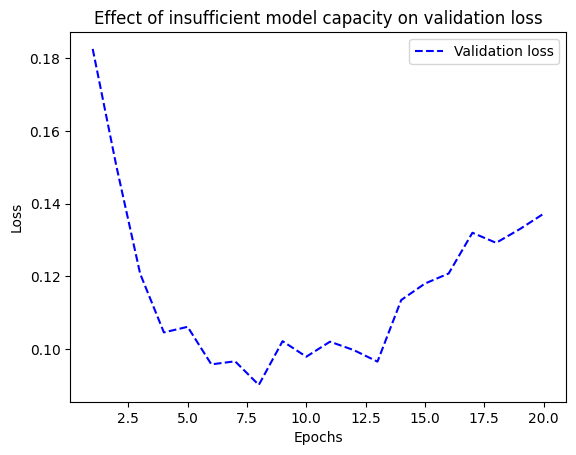

In [37]:
import matplotlib.pyplot as plt

# Plotting the validation loss of the larger model.
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Loss functions

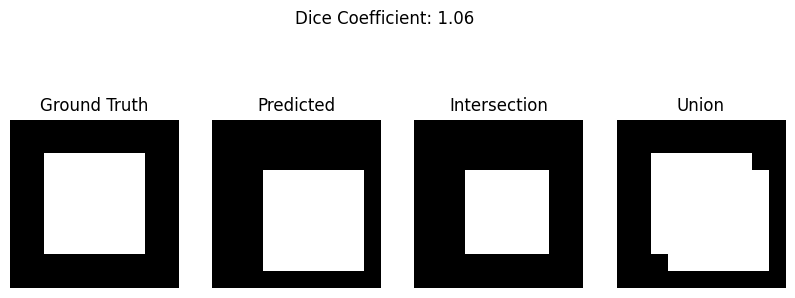

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create a synthetic 'ground truth' segmentation and a 'predicted' segmentation
ground_truth = np.zeros((10, 10))
predicted = np.zeros((10, 10))

ground_truth[2:8, 2:8] = 1  # Ground truth object
predicted[3:9, 3:9] = 1     # Predicted object

# Calculate intersection and union for illustration purposes
intersection = np.logical_and(ground_truth, predicted)
union = np.logical_or(ground_truth, predicted)
dice_coeff = 2 * np.sum(intersection) / np.sum(union)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(ground_truth, cmap='gray')
axs[0].set_title('Ground Truth')
axs[0].axis('off')

axs[1].imshow(predicted, cmap='gray')
axs[1].set_title('Predicted')
axs[1].axis('off')

axs[2].imshow(intersection, cmap='gray')
axs[2].set_title('Intersection')
axs[2].axis('off')

axs[3].imshow(union, cmap='gray')
axs[3].set_title('Union')
axs[3].axis('off')

fig.suptitle(f'Dice Coefficient: {dice_coeff:.2f}')
plt.show()


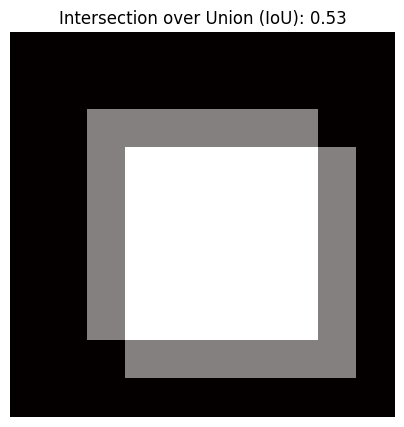

In [39]:
# Plotting Intersection over Union
iou = np.sum(intersection) / np.sum(union)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(union, cmap='gray')
ax.imshow(intersection, cmap='hot', alpha=0.5)  # Overlay intersection
ax.set_title(f'Intersection over Union (IoU): {iou:.2f}')
ax.axis('off')
plt.show()
